In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Set up some parameters for pretty plots
plt.rcParams.update({
    'figure.dpi': 200,
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.size": 15,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.max_open_warning": False,
})


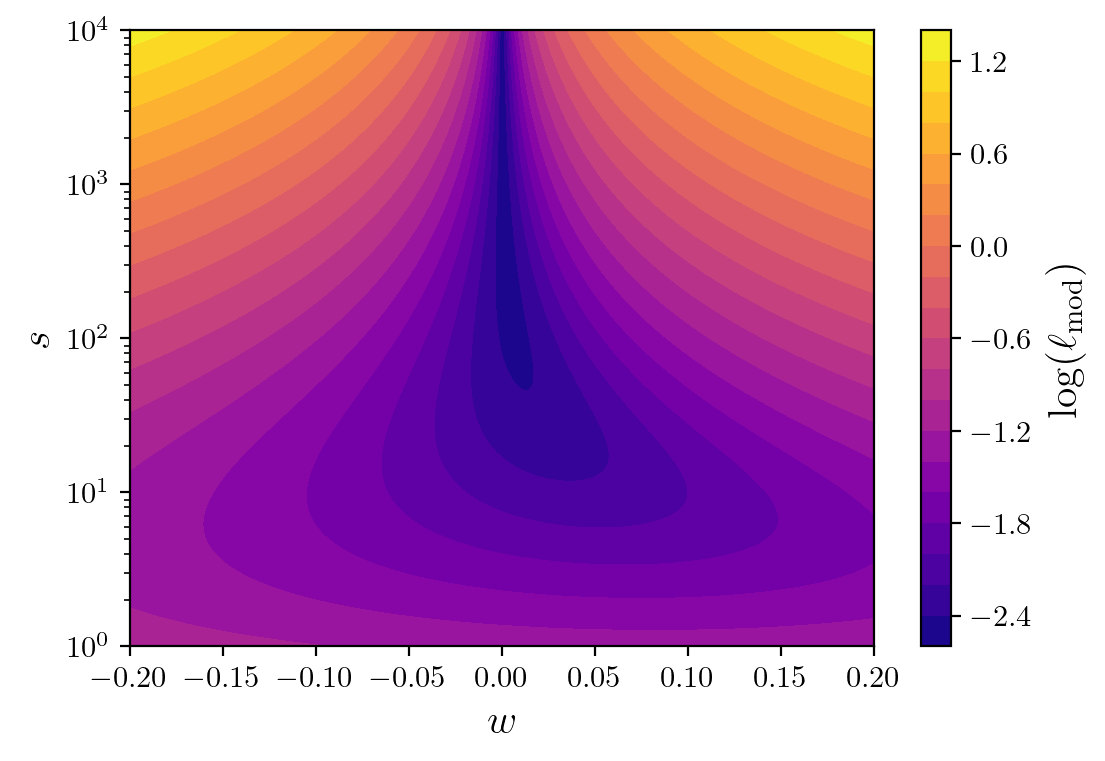

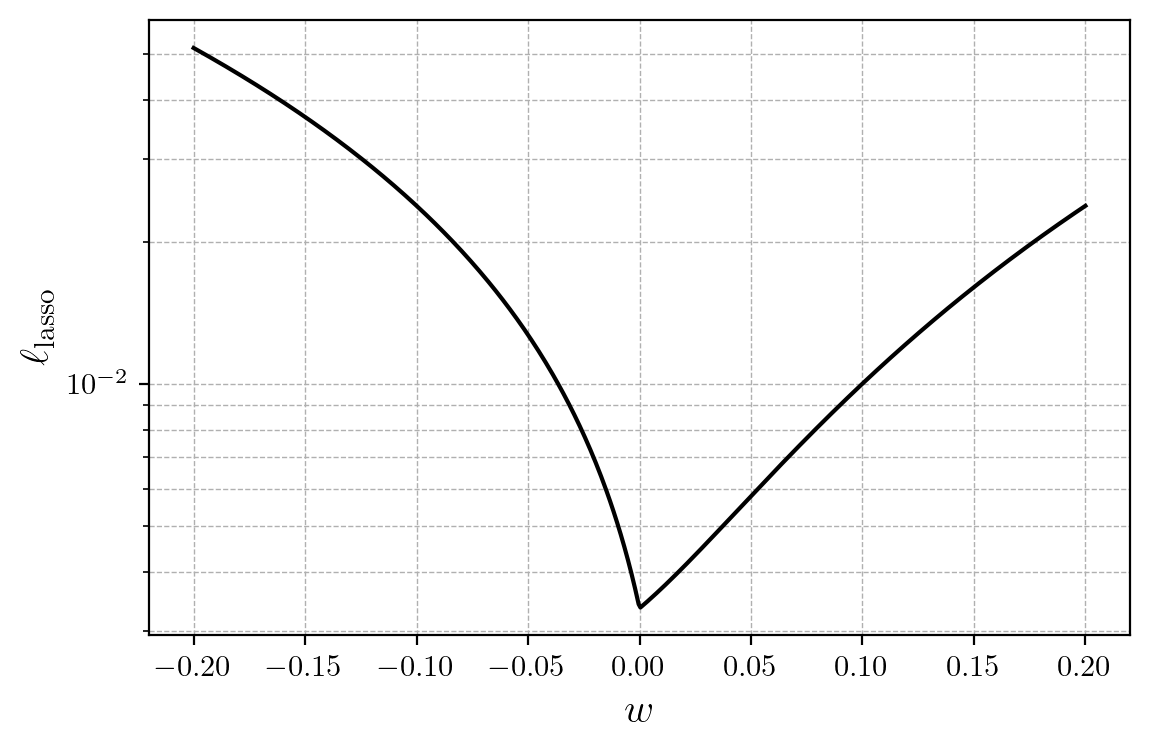

In [17]:
# Generate random sorted data
x = np.sort(np.random.rand(100))
y = 0.1 * np.sort(np.random.rand(100))

# First plot
def loss(a, s, lambda_value=0.1):
    xx = np.dot(x, x)
    xy = np.dot(x, y)
    yy = np.dot(y, y)
    N = x.size
    value = a ** 2 * xx - 2 * a * xy + yy
    value = value / N + lambda_value / 2 * (s * a ** 2 + 1 / s)
    return value

a_vals = np.linspace(-0.2, 0.2, 500)
s_vals = np.logspace(0, 4, 500)
A_vals, S_vals = np.meshgrid(a_vals, s_vals)
Z_vals = loss(A_vals, S_vals)

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

contour = ax1.contourf(A_vals, S_vals, np.log10(Z_vals), levels=20, cmap='plasma')
ax1.set_xlabel(r'$w$')
ax1.set_ylabel(r'$s$')
ax1.set_yscale('log')
cbar = plt.colorbar(contour)
cbar.set_label(r'$\log(\ell_{\rm mod})$')

# Second plot
def new_loss(a, lambda_value=0.1):
    xx = np.dot(x, x)
    xy = np.dot(x, y)
    yy = np.dot(y, y)
    N = x.size
    value = a ** 2 * xx - 2 * a * xy + yy
    value = value / N + lambda_value * np.sqrt(a ** 2)
    return value

fig, ax2 = plt.subplots(1, 1, figsize=(6, 4))

a_vals = np.linspace(-0.2, 0.2, 500)
ax2.semilogy(a_vals, new_loss(a_vals), 'k')
ax2.set_xlabel(r'$w$')
ax2.set_ylabel(r'$\ell_{\mathrm{lasso}}$')
ax2.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()


In [3]:
def lpp_norm(x, p):
    return (x ** 2) ** (p / 2)

# Your arg_prox_p function
def arg_prox_p(x, v, p):
    return lpp_norm(x, p) + 0.5 * (x - v) ** 2

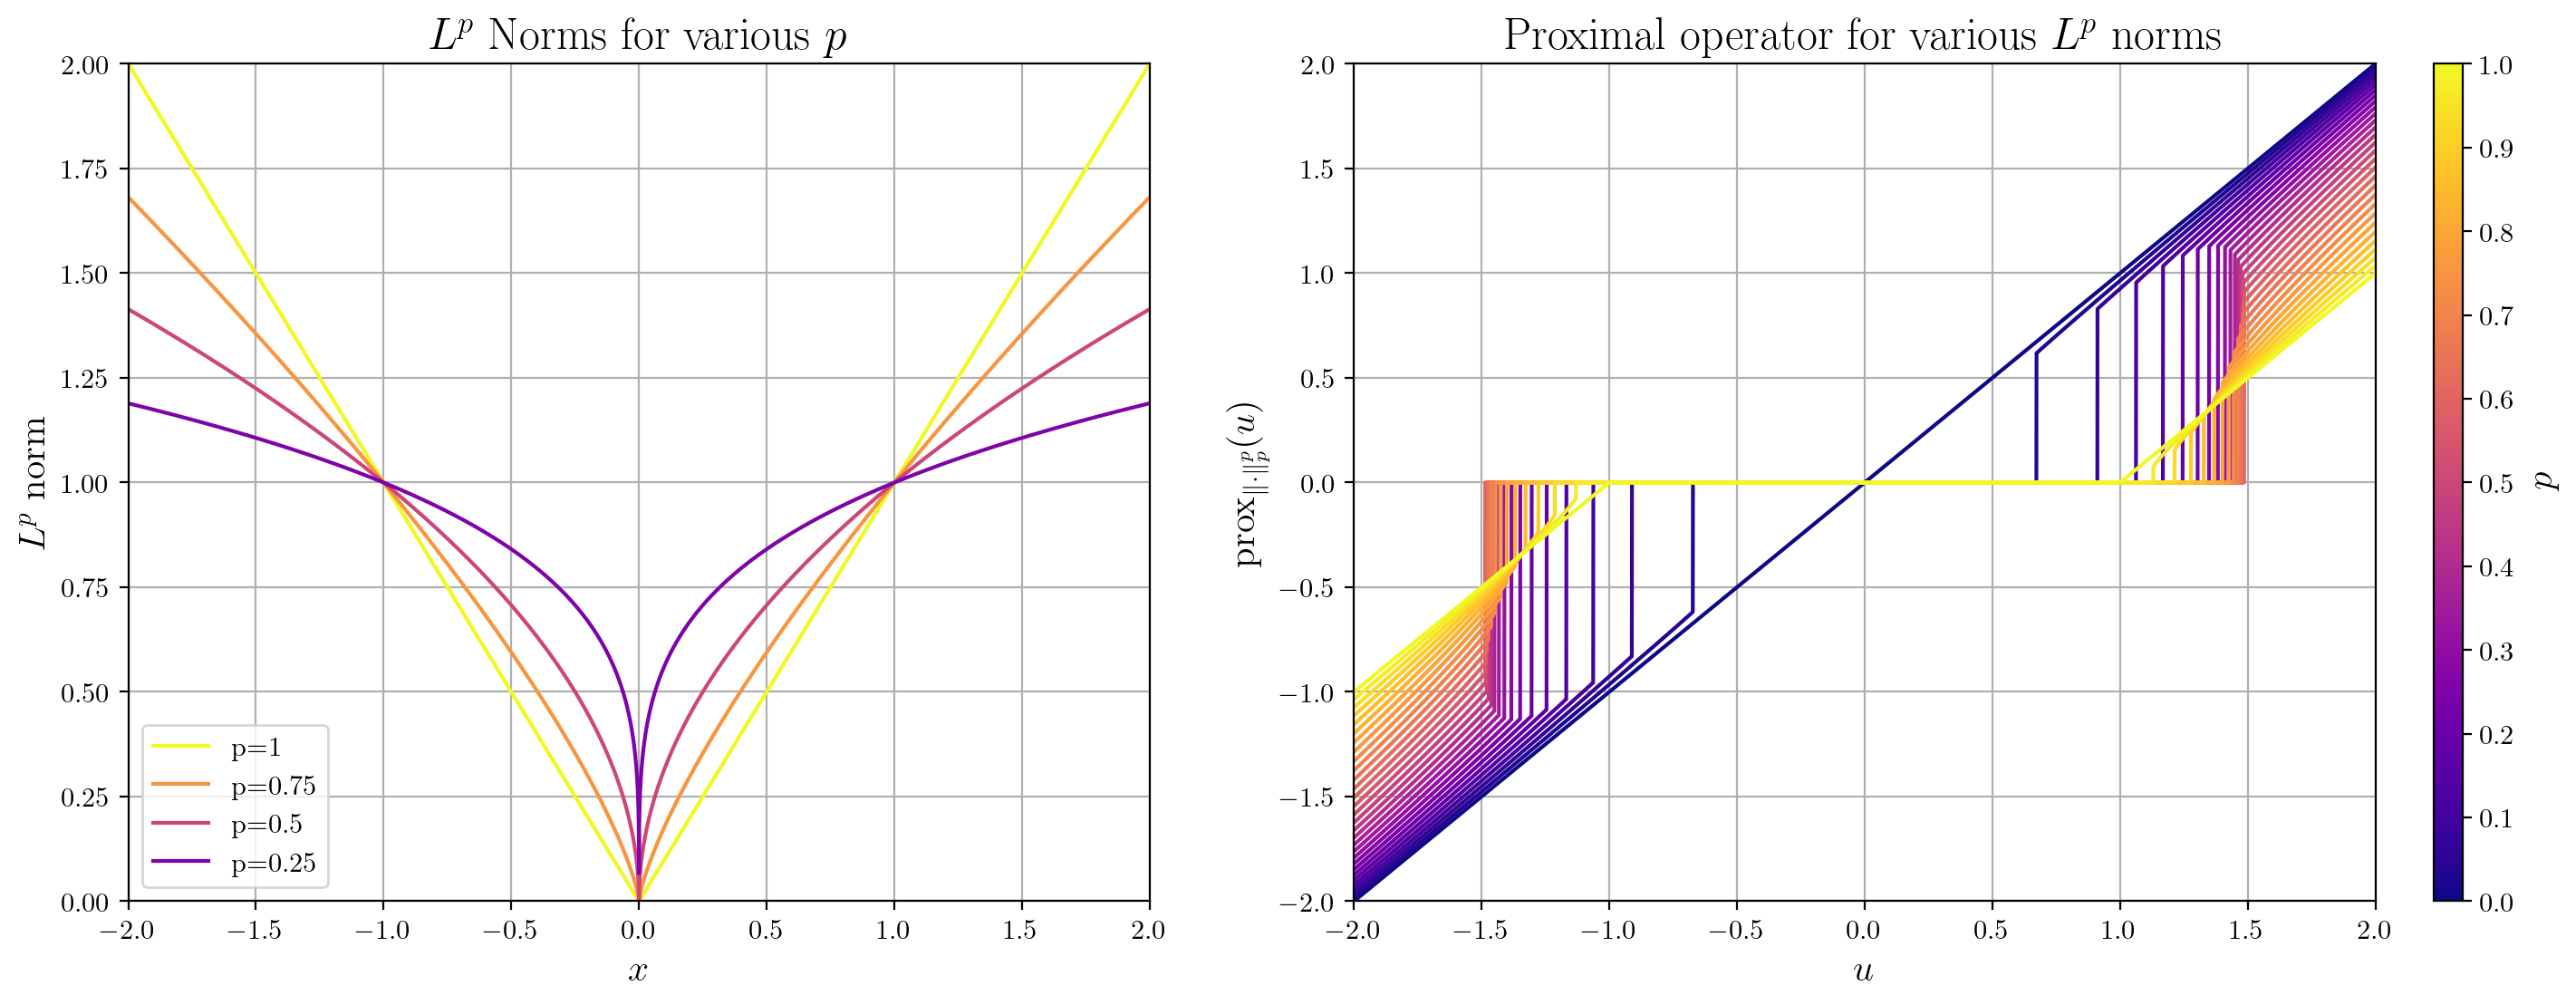

In [50]:
# Generating the meshgrid for the first plot
x_values = np.linspace(-2, 2, 6000)
v_values = np.linspace(-2, 2, 6000)
X, V = np.meshgrid(x_values, v_values)

# Generate list of p values between 0 and 1 for the first plot
num_lines = 30
p_values = np.linspace(0, 1, num_lines)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))

# Colormap for both plots
colormap = plt.cm.plasma

# First Plot (now on the right)
norm = mcolors.Normalize(vmin=0, vmax=1)
for p in p_values:
    Z = arg_prox_p(X, V, p)
    argmin_x = x_values[np.argmin(Z, axis=1)]
    ax1.plot(v_values, argmin_x, color=colormap(norm(p)))

# Second Plot (now on the left)
selected_p_values = [1, 0.75, 0.5, 0.25]
x_lis = np.linspace(-2, 2, 100000)
for p in selected_p_values:
    ax2.plot(x_lis, lpp_norm(x_lis, p), label=f'p={p}', color=colormap(norm(p)))

# Add colorbar
pos = ax1.get_position()
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, pos.y0, 0.01, pos.height])  # left, bottom, width, height
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=np.linspace(0, 1, 11))
cbar.set_label('$p$')

# Labels and titles
ax1.set_xlabel('$u$')
ax1.set_ylabel('$\\mathrm{prox}_{\\Vert \\cdot \\Vert _p^p}(u)$')
ax1.set_title('Proximal operator for various $L^p$ norms')
ax1.grid(True)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$L^p$ norm')
ax2.set_title('$L^p$ Norms for various $p$')
ax2.legend()
ax2.grid(True)

# Plot limits
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 2)

plt.savefig('../64cd9181a4709530b3f72d35/figs/Lp_prox.pdf', bbox_inches='tight', transparent=True)

plt.show()

In [35]:
Z = arg_prox_p(X, V, 0.5)
v_values[x_values[np.argmin(Z, axis=1)]**2<0.000001][-1]


1.481913652275379

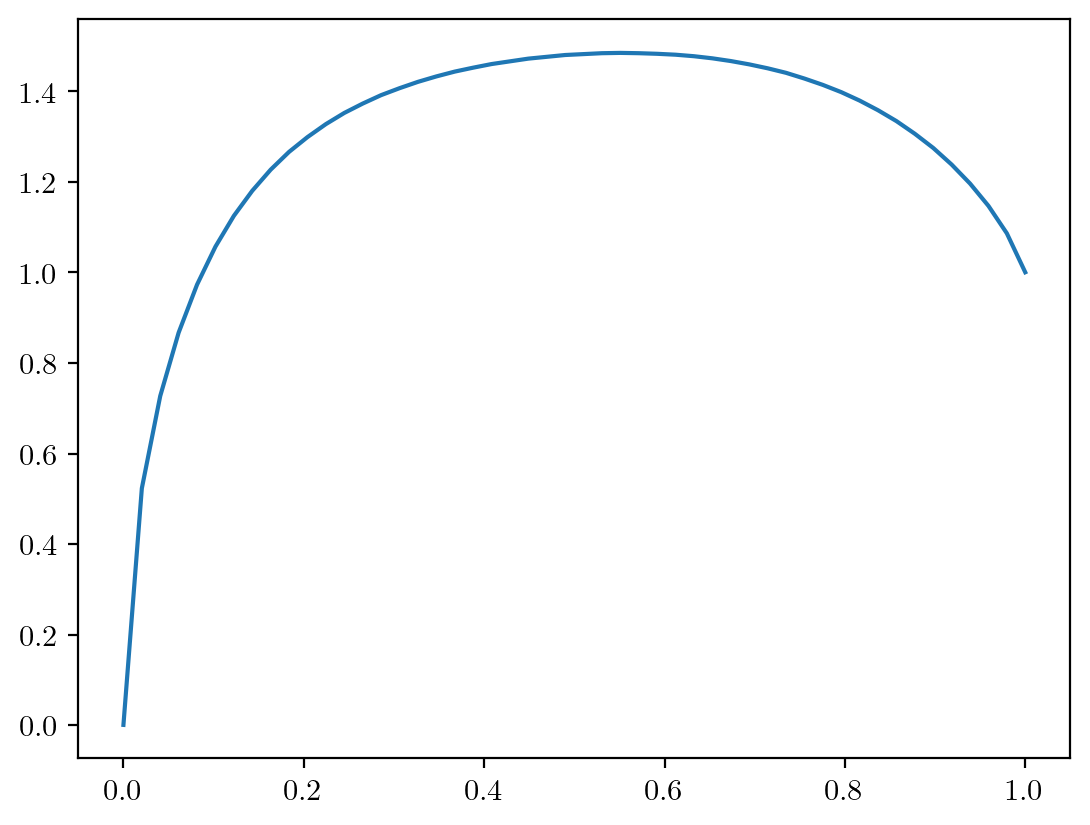

In [46]:
plt.plot(p_values, nns)
plt.show()


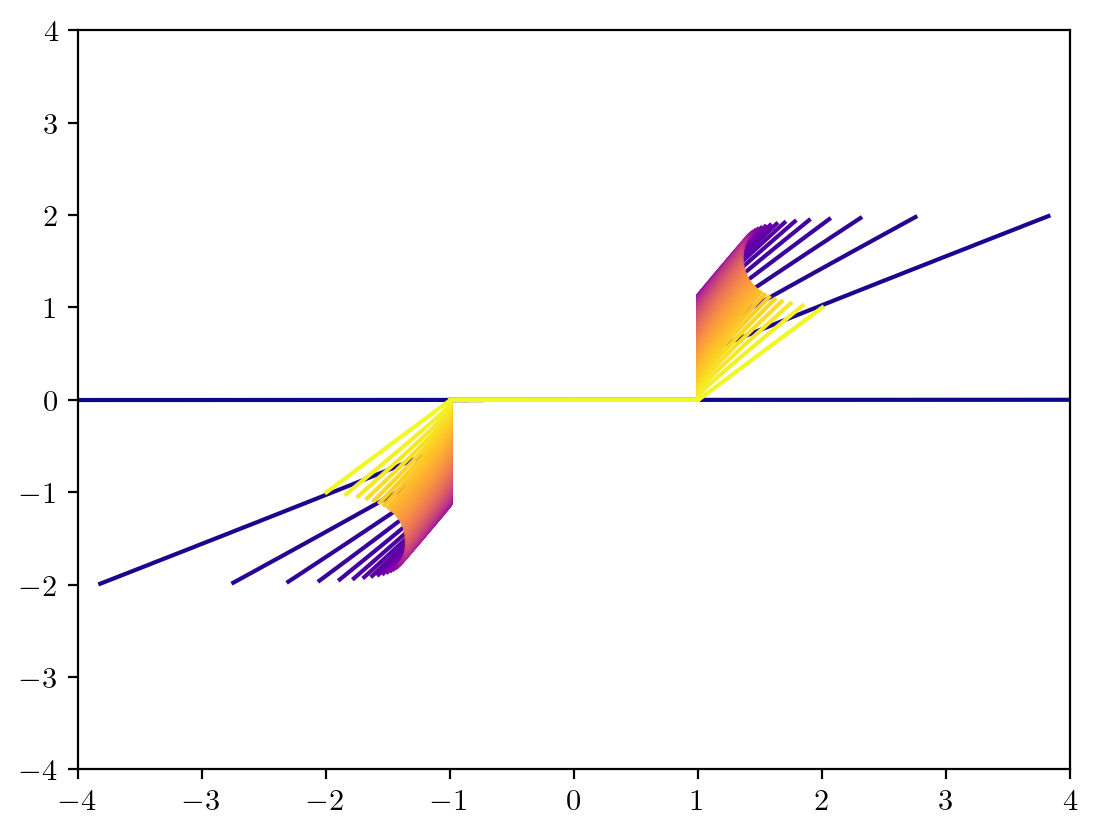

In [45]:
num_lines = 50
p_values = np.linspace(0, 1, num_lines)

#Renormalized plot
nns=[]
for p in p_values:
    Z = arg_prox_p(X, V, p)
    argmin_x = x_values[np.argmin(Z, axis=1)]
    nn=v_values[x_values[np.argmin(Z, axis=1)]**2<0.000001][-1]
    nns.append(nn)
    plt.plot(v_values/nn, argmin_x, color=colormap(norm(p)))

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [2]:
from PIL import Image, ImageSequence

# Open the original GIF
with Image.open("/Users/nadavoutmezguine/Library/CloudStorage/Dropbox/Mac/Desktop/Screen Recording 2023-09-05 at 2.29.59 PM.gif") as im:

    frames = [frame.copy() for frame in ImageSequence.Iterator(im)]
    frames_filtered = frames[::10]  # Keep only one in 10 frames

    # Save the new GIF
    frames_filtered[0].save("/Users/nadavoutmezguine/Library/CloudStorage/Dropbox/Mac/Desktop/sped_up.gif",
                            save_all=True,
                            append_images=frames_filtered[1:],
                            optimize=True,
                            loop=0)




In [ ]:

class AdamSqueeze(Adam):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 Newton=None,  # Newton function for updating sigma
                 threshold=1e-2  # Scaling factor for the soft-thresholding operation
                 ):
        super(AdamSqueeze, self).__init__(params, lr=lr, betas=betas, eps=eps, weight_decay=0)
        self.Newton = Newton
        self.threshold = threshold
        self.sigma = {}  # We'll store sigma for each parameter tensor here

    def step(self, closure=None):
        loss = super().step(closure)
        
        # Perform custom operations
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                
                # If sigma for this tensor hasn't been initialized, do so
                if p not in self.sigma:
                    self.sigma[p] = torch.ones_like(p)
                
                # Compute exp(sigma) first, as it is used in both Newton and soft-thresholding
                exp_sigma = torch.exp(self.sigma[p])

                # Update sigma using the Newton function
                self.sigma[p] -= self.Newton(exp_sigma, p.data)
                
                # Perform the soft-thresholding operation directly using exp(sigma)
                p.data = torch.sign(p.data) * torch.clamp(torch.abs(p.data) - self.threshold * self.lr * exp_sigma, min=0)
        
        return loss
